In [3]:
import os, ast
import pandas as pd
import matplotlib.pyplot as plt


### Tensorflow:
- no change in Lr 

In [2]:
path_1 ='./logs_tf/logs'
names = sorted(os.listdir(path_1))   

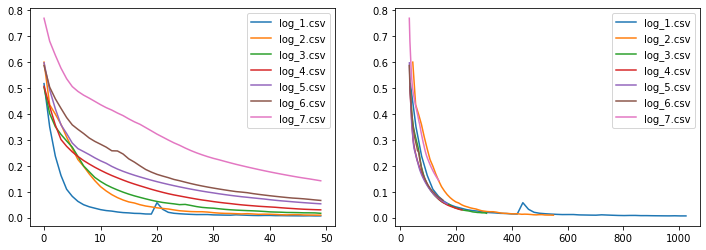

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
for i,name in enumerate(names):
    path = path_1 +'/'+names[i]
    Df = pd.read_csv(path, delimiter=',', header=0)
    ax1.plot(Df.loss, label=name)
    ax2.plot(Df.time_per_epoch.cumsum(), Df.loss, label=name)
#     ax2.set_ylim([0,0.5])
    
ax1.legend()
ax2.legend()

 - change in lr: warm up for 5 epochs + scheduling 

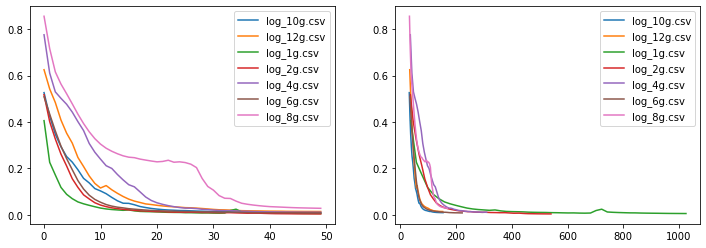

In [40]:
path_1 ='./logs_tf/logs_lr_1/'  
names = sorted(os.listdir(path_1))   

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
for i,name in enumerate(names):
    path = path_1 +'/'+names[i]
    Df = pd.read_csv(path, delimiter=',', header=0)
    ax1.plot(Df.loss, label=name)
    ax2.plot(Df.time_per_epoch.cumsum(), Df.loss, label=name)
#     ax2.set_ylim([0,0.5])
    
ax1.legend()
ax2.legend()

10 160.0343792438507
12 159.5913472175598
1 1027.4471471309662
2 546.6126828193665
4 313.7479212284088
6 226.09954953193665
8 172.88153195381165


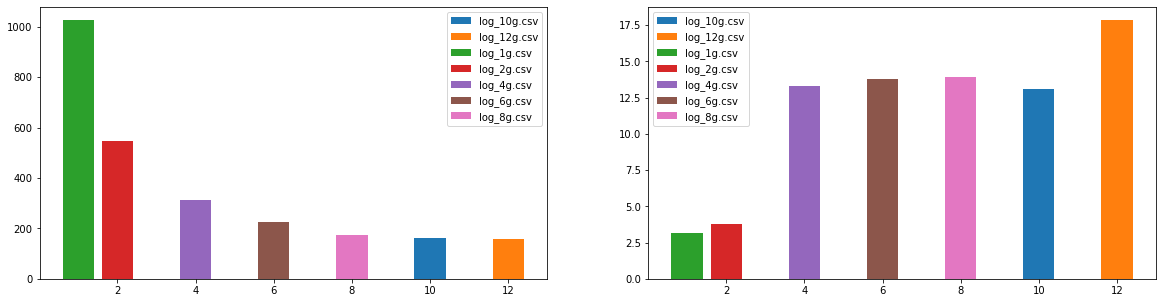

In [9]:
path_1 ='./logs_tf/logs_lr_1' 
names = sorted(os.listdir(path_1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
for i,name in enumerate(names):
    
    path = path_1 +'/'+names[i]
    Df = pd.read_csv(path, delimiter=',', header=0)
    print((name[4:-5]), Df.training_time[0])
    ax1.bar(int(name[4:-5]), Df.training_time[0], label=name)
    ax2.bar(int(name[4:-5]), Df.test_time[0], label=name)
#     ax3.plot(Df.val_loss, label=name)
#     ax3.set_ylim([0,0.2])

ax1.legend()
ax2.legend()
# ax3.legend()

- change in lr: warm up for 10 epochs + scheduling (I did the division wrong it should be by 10 it is by 5)

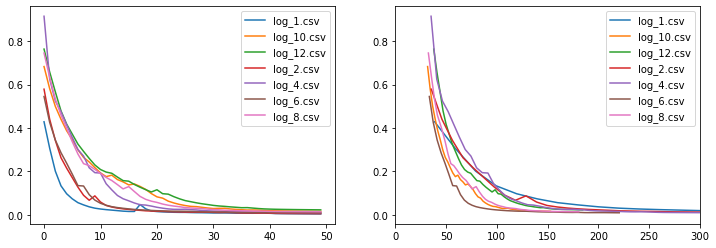

In [15]:
path_1 ='./logs_tf/logs_lr_2/'  
names = sorted(os.listdir(path_1))   

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
for i,name in enumerate(names):
    path = path_1 +'/'+names[i]
    Df = pd.read_csv(path, delimiter=',', header=0)
    ax1.plot(Df.loss, label=name)
    ax2.plot(Df.time_per_epoch.cumsum(), Df.loss, label=name)
    ax2.set_xlim([0,300])
    
ax1.legend()
ax2.legend()

- no warm-up, ls rule, no final scheduling  

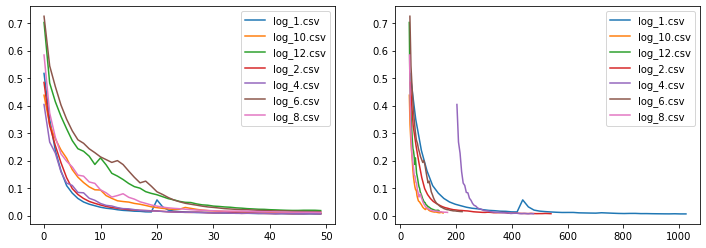

In [5]:
path_1 ='./logs_tf/logs_ls/'  
names = sorted(os.listdir(path_1))   

fig, axes = plt.subplots(1, 2, figsize=(12,4))
ax1, ax2 = axes.flatten()
for i,name in enumerate(names):
    path = path_1 +'/'+names[i]
    Df = pd.read_csv(path, delimiter=',', header=0)
    ax1.plot(Df.loss, label=name)
    ax2.plot(Df.time_per_epoch.cumsum(), Df.loss, label=name)
#     ax2.set_ylim([0,0.5])
ax1.legend()
ax2.legend()

log_1.csv
log_2.csv
log_3.csv
log_4.csv
error
log_5.csv
log_6.csv
error


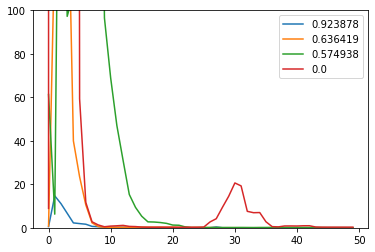

In [142]:
path_1 ='./logs_tf/logs_ls_sched/'  
names = sorted(os.listdir(path_1))

for i,name in enumerate(names):
    print(name)
    path = path_1 +'/'+names[i]
    Df = pd.read_csv(path, delimiter=',', header=0)
    plt.ylim([0, 100])
    try:
        plt.plot(Df.val_loss, label=Df.iou[0])
    except:
        print("error")
plt.legend()        
        
#     ax2.plot(Df.time_per_epoch.cumsum(), Df.val_loss, label=name)


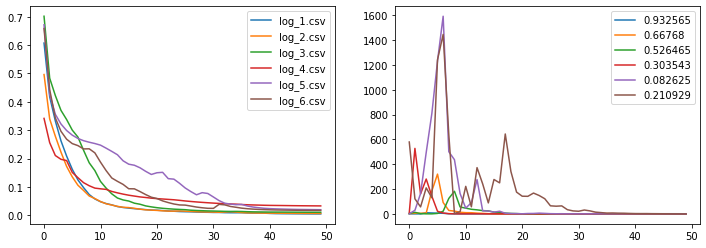

In [12]:
path_1 ='./logs_tf/logs_test_ls_sched/'  
names = sorted(os.listdir(path_1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

for i,name in enumerate(names):

    path = path_1 +'/'+names[i]
    Df = pd.read_csv(path, delimiter=',', header=0)
    ax1.plot(Df.loss, label=name)
    ax2.plot(Df.val_loss, label=Df.iou[0])
#     ax1.set_ylim([0,0.2])
#     ax2.set_ylim([0,0.2])
#     ax2.set_ylim([0,1])
    
ax1.legend()
ax2.legend()

  ### Pytorch
  - no change in Lr 
  

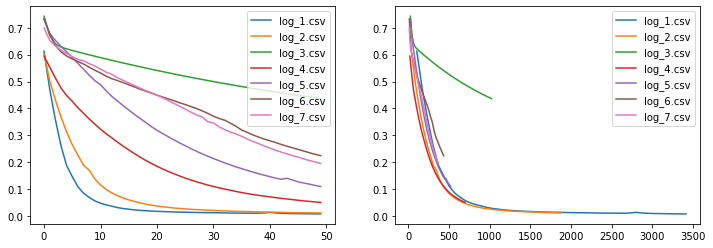

In [135]:
path = './logs_py/logs'
names = sorted(os.listdir(path)) 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

for i,name in enumerate(names):
    path_1 = path +'/'+names[i]
    Df = pd.read_csv(path_1, delimiter=',', header=0)
    ax1.plot(Df.loss, label=name)
    ax2.plot(Df.time_per_epoch.cumsum(), Df.loss, label=name)
#     ax2.set_ylim([0,0.5])
    
ax1.legend()
ax2.legend()

 - change in lr: warm up for 5 epochs + scheduling 

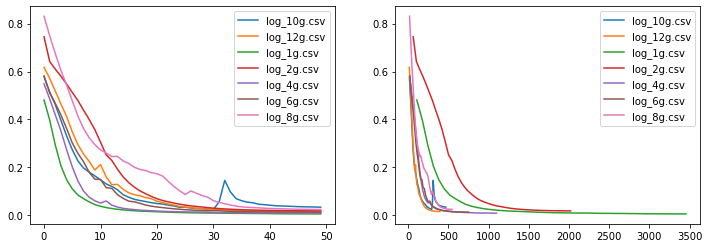

In [136]:
path ='./logs_py/logs_lr_1'  
names = sorted(os.listdir(path))   

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

for i,name in enumerate(names):
    path_1 = path +'/'+names[i]
    Df = pd.read_csv(path_1, delimiter=',', header=0)
    ax1.plot(Df.loss, label=name)
    ax2.plot(Df.time_per_epoch.cumsum(), Df.loss, label=name)
#     ax2.set_ylim([0,0.5])
    
ax1.legend()
ax2.legend()

 - change in lr: warm up for 10 epochs + scheduling 

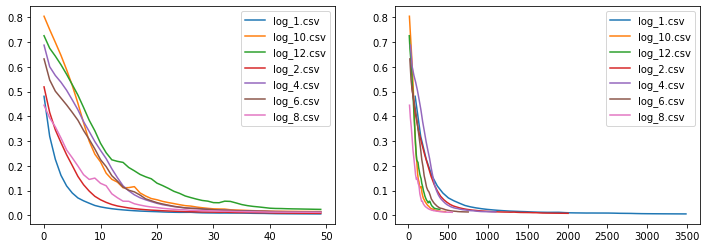

In [137]:
path ='./logs_py/logs_lr_2'  
names = sorted(os.listdir(path))   

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

for i,name in enumerate(names):
    path_1 = path +'/'+names[i]
    Df = pd.read_csv(path_1, delimiter=',', header=0)
    ax1.plot(Df.loss, label=name)
    ax2.plot(Df.time_per_epoch.cumsum(), Df.loss, label=name)
#     ax2.set_ylim([0,0.5])
    
ax1.legend()
ax2.legend()

- no warm-up, ls rule, no final scheduling  

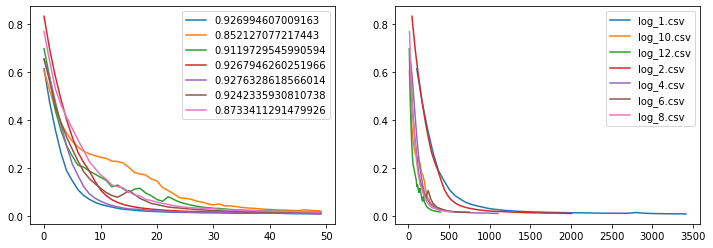

In [138]:
path ='./logs_py/logs_ls/'  
names = sorted(os.listdir(path))   

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

for i,name in enumerate(names):
    path_1 = path +'/'+names[i]
    Df = pd.read_csv(path_1, delimiter=',', header=0)
    ax1.plot(Df.loss, label=Df.iou[0])
    ax2.plot(Df.time_per_epoch.cumsum(), Df.loss, label=name)
#     ax2.set_ylim([0,0.5])
    
ax1.legend()
ax2.legend()

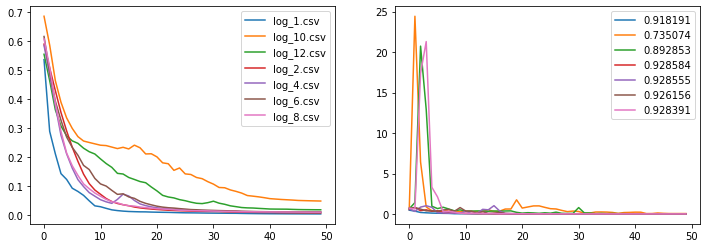

In [11]:
path_1 ='./logs_py/logs_ls_sched_module_train/'  
names = sorted(os.listdir(path_1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

for i,name in enumerate(names):

    path = path_1 +'/'+names[i]
    Df = pd.read_csv(path, delimiter=',', header=0)
    ax1.plot(Df.loss, label=name)
    ax2.plot(Df.val_loss, label=Df.iou[0])
#     ax1.set_ylim([0,0.2])
#     ax2.set_ylim([0,0.2])
    
ax1.legend()
ax2.legend()